In [7]:
import tensorflow as ts
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

2


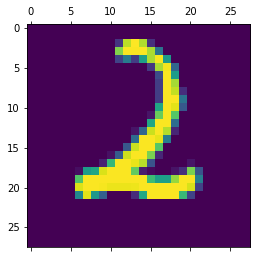

In [9]:
plt.matshow(X_train[122])
print(Y_train[122])

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train_flat = X_train.reshape(len(X_train),28*28)

In [21]:
X_train_flat.shape

(60000, 784)

In [22]:
X_test_flat = X_test.reshape(len(X_test),28*28)

In [23]:
X_test_flat.shape

(10000, 784)

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flat,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4760 - accuracy: 0.8726
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9263


In [25]:
model.evaluate(X_test_flat,Y_test)

313/313 [==============================] - 0s 861us/step - loss: 0.2703 - accuracy: 0.9256


[0.2703368067741394, 0.925599992275238]

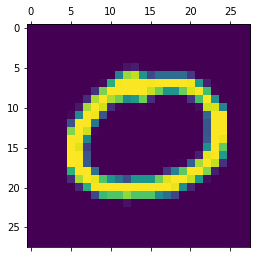

In [27]:
plt.matshow(X_test[69])

In [31]:
Y_predicted = model.predict(X_test_flat)
Y_predicted[69]

313/313 [==============================] - 0s 741us/step


array([9.9972147e-01, 7.0600570e-10, 2.0013565e-01, 1.4244799e-03,
       1.6911093e-08, 9.3256611e-01, 2.8536406e-01, 1.6884169e-03,
       2.3351684e-02, 5.6530157e-06], dtype=float32)

In [33]:
np.argmax(Y_predicted[69])

0

In [40]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted ]

In [50]:
cm = ts.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    2,    2,    1,    1,    3,    2,    2,    2],
       [   0, 1121,    7,    1,    0,    1,    2,    1,    2,    0],
       [   3,    0, 1018,    0,    2,    0,    1,    5,    3,    0],
       [   0,    0,    8,  983,    0,    2,    0,    9,    4,    4],
       [   1,    0,    4,    0,  969,    0,    0,    2,    2,    4],
       [   2,    0,    0,   10,    1,  865,    4,    2,    5,    3],
       [   4,    3,    6,    1,    3,    7,  932,    0,    2,    0],
       [   0,    3,   12,    2,    2,    0,    0, 1002,    1,    6],
       [   1,    1,   11,    9,    4,    5,    2,    4,  935,    2],
       [   3,    7,    1,    5,   12,    5,    0,    4,    3,  969]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

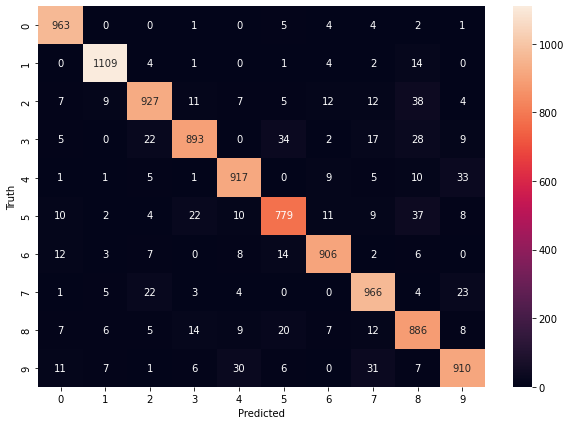

In [43]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
    
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flat,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2769 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1274 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0900 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0555 - accuracy: 0.9827


In [47]:
model.evaluate(X_test_flat,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9758


[0.07913606613874435, 0.9757999777793884]

In [53]:
Y_predicted = model.predict(X_test_flat)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted ]

313/313 [==============================] - 0s 968us/step


In [54]:
cm = ts.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    2,    2,    1,    1,    3,    2,    2,    2],
       [   0, 1121,    7,    1,    0,    1,    2,    1,    2,    0],
       [   3,    0, 1018,    0,    2,    0,    1,    5,    3,    0],
       [   0,    0,    8,  983,    0,    2,    0,    9,    4,    4],
       [   1,    0,    4,    0,  969,    0,    0,    2,    2,    4],
       [   2,    0,    0,   10,    1,  865,    4,    2,    5,    3],
       [   4,    3,    6,    1,    3,    7,  932,    0,    2,    0],
       [   0,    3,   12,    2,    2,    0,    0, 1002,    1,    6],
       [   1,    1,   11,    9,    4,    5,    2,    4,  935,    2],
       [   3,    7,    1,    5,   12,    5,    0,    4,    3,  969]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

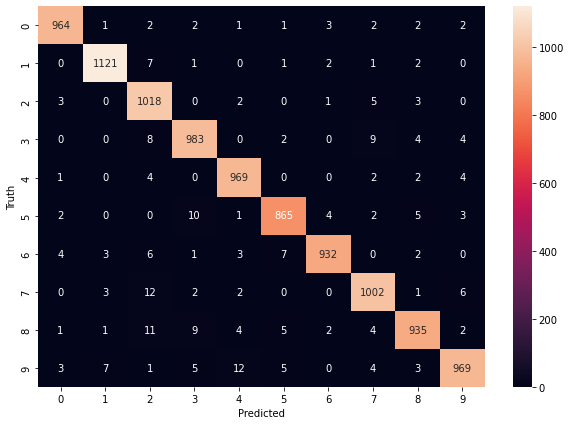

In [55]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')